In [1]:
# Run this if on Google Colab/first time:
# !pip install pandas matplotlib seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Replace this path with your CSV file once uploaded
df = pd.read_csv("/content/Experiment_HCI_ShapeItUp-Eksperimen_1.csv")

# Tampilkan 5 baris awal untuk cek struktur
df.head()

,timestamp,soal-ke,Jumlah Kategori,Kombinasi Tipe,Jawaban Peserta,Jawaban Benar,Status,Bentuk Digunakan,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,2025-06-19 11:06:20,2,8,filled+open,arrow,arrow,Benar,"minus-open.png, square-x-open.png, y-filled.pn...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-06-19 11:06:27,3,5,filled+open,circle,circle,Benar,"arrow-horizontal-open.png, square-x-open.png, ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-06-19 12:28:36,2,7,filled+open,square,square,Benar,"star-filled.png, triangle-filled.png, y-filled...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-06-19 12:28:45,3,8,filled+unfilled+open,minus,minus,Benar,"minus-open.png, diamond-filled.png, y-filled.p...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-06-19 12:31:49,4,7,filled+open,cross,cross,Benar,"arrow-horizontal-open.png, cross-open.png, min...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Lihat kolom yang tersedia
print(df.columns)

# Pastikan kolom 'status' hanya berisi 'Benar' dan 'Salah'
df['Status'] = df['Status'].str.strip().str.capitalize()

# Cek nilai unik
print(df['Status'].value_counts())


Index(['timestamp', 'soal-ke', 'Jumlah Kategori', 'Kombinasi Tipe',
       'Jawaban Peserta', 'Jawaban Benar', 'Status', 'Bentuk Digunakan',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')
Status
Benar    483
Salah    180
Name: count, dtype: int64


In [ ]:
accuracy = (df['Status'] == 'Benar').mean() * 100
print(f"🎯 Total Accuracy: {accuracy:.2f}%")

🎯 Total Accuracy: 72.85%


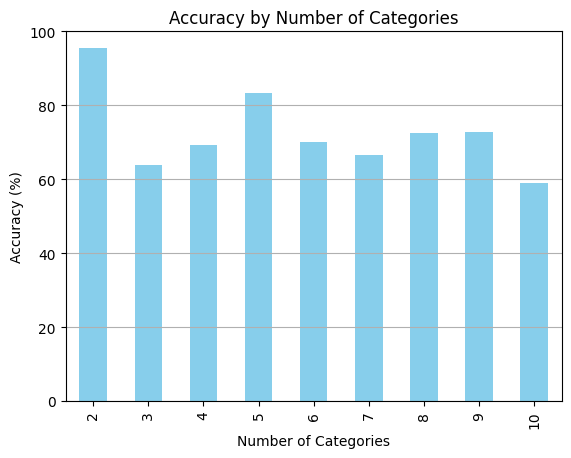

In [ ]:
grouped = df.groupby('Jumlah Kategori')['Status'].value_counts(normalize=True).unstack().fillna(0) * 100
grouped[['Benar']].plot(kind='bar', legend=False, color='skyblue')
plt.title("Accuracy by Number of Categories")
plt.ylabel("Accuracy (%)")
plt.xlabel("Number of Categories")
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

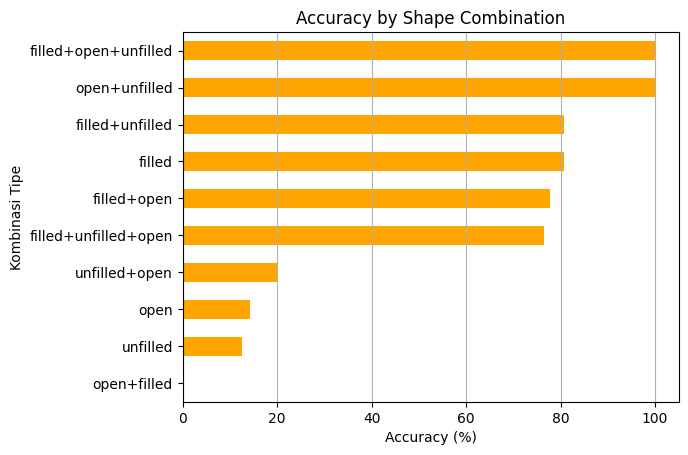

In [ ]:
combo = df.groupby('Kombinasi Tipe')['Status'].value_counts(normalize=True).unstack().fillna(0) * 100
combo[['Benar']].sort_values(by='Benar').plot(kind='barh', color='orange', legend=False)
plt.title("Accuracy by Shape Combination")
plt.xlabel("Accuracy (%)")
plt.grid(axis='x')
plt.show()